# 6.3: Geographical Visualisations

## This script contains the following:

### 1. Importing libraries and data

### 2. Data Wrangling

### 3. Data Cleaning

### 4. Creating a choropleth map

### 5. Discussing results

### 1. Importing libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# Prompt matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import JSON file

countries_geo = r'C:\Users\Lenad\Documents\Data Analytics Immersion\Achievement 6\Jupyter folder\Achievement 6 project\02. Data\Original data\world-countries.json'

In [4]:
countries_geo

'C:\\Users\\Lenad\\Documents\\Data Analytics Immersion\\Achievement 6\\Jupyter folder\\Achievement 6 project\\02. Data\\Original data\\world-countries.json'

In [5]:
# Review JSON

f = open(r'C:\Users\Lenad\Documents\Data Analytics Immersion\Achievement 6\Jupyter folder\Achievement 6 project\02. Data\Original data\world-countries.json',)
  
# Return JSON object as a dictionary
data = json.load(f)
  
# Iterate through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

In [6]:
# Create path

path = r'C:\Users\Lenad\Documents\Data Analytics Immersion\Achievement 6\Jupyter folder\Achievement 6 project'

In [7]:
# Import data

df = pd.read_csv(os.path.join(path, '02. Data', 'Prepared data', 'Travelpac_cleaned.csv'), index_col = False)

In [8]:
df.head()

,Unnamed: 0,Year,Quarter,UKOS,Mode,Country,Purpose,Package,Age,Sex,Duration of trip,Number of visits,Number of nights,Expenditure,Sample
0,0,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,0-15,Male,4-13 nights,4327.762,30294.331,2473496.413,3.0
1,1,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,0-15,Female,1-3 nights,1482.093,4446.280,395718.932,1.0
2,2,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,0-15,Female,4-13 nights,2356.400,17976.891,1885922.404,2.0
3,3,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,16-24,Male,4-13 nights,10278.171,52140.224,8260875.139,6.0
4,4,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,16-24,Female,1-3 nights,5241.563,15724.689,847512.731,3.0


In [9]:
# Drop 'Unnamed: 0' variable

df = df.drop(columns = ['Unnamed: 0'])

In [10]:
df.shape

(33703, 14)

### 2. Data wrangling

In [11]:
# Change country names to match JSON file

df['Country'] = df['Country'].replace({
    'Cyprus EU' : 'Cyprus', 
    'Cyprus Non EU' : 'Northern Cyprus',
    'Irish Republic' : 'Ireland',
    'China - Other' : 'China',
    'UK' : 'United Kingdom',
    'USA' : 'United States of America'
    })

### 3. Data cleaning

In [12]:
# Check data types

df.dtypes

Year                  int64
Quarter              object
UKOS                 object
Mode                 object
Country              object
Purpose              object
Package              object
Age                  object
Sex                  object
Duration of trip     object
Number of visits    float64
Number of nights    float64
Expenditure         float64
Sample              float64
dtype: object

In [13]:
# Check for missing values

df.isnull().sum()

Year                0
Quarter             0
UKOS                0
Mode                0
Country             0
Purpose             0
Package             0
Age                 0
Sex                 0
Duration of trip    0
Number of visits    0
Number of nights    0
Expenditure         0
Sample              0
dtype: int64

In [14]:
# Check for duplicates

dups = df.duplicated()

In [15]:
dups.shape # No duplicates

(33703,)

In [16]:
# Check for extreme values

<Axes: xlabel='Number of visits', ylabel='Count'>

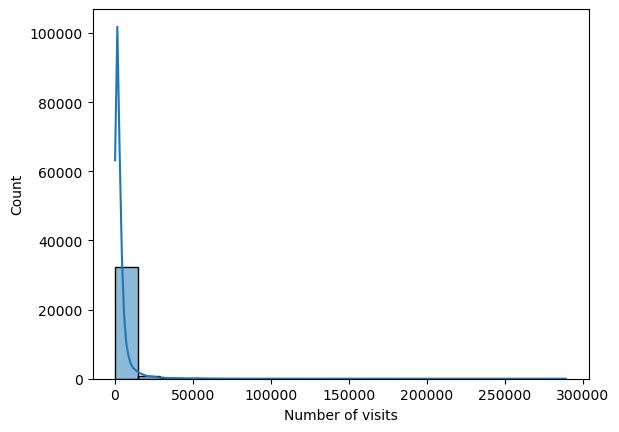

In [17]:
sns.histplot(df['Number of visits'], bins=20, kde = True)

<Axes: ylabel='Number of visits'>

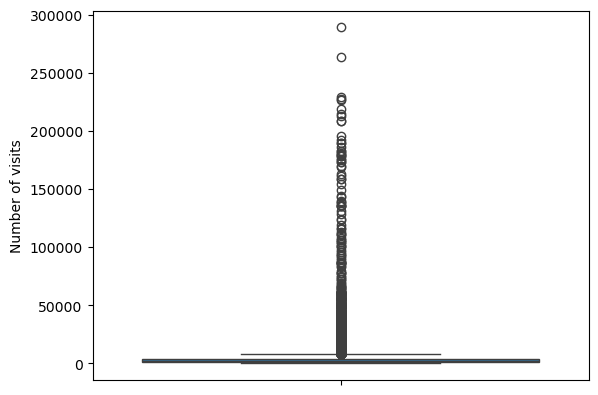

In [18]:
sns.boxplot(y='Number of visits', data=df)

In [19]:
# Clean extreme values

df = df[df['Number of visits'] < 250000] 

<Axes: ylabel='Number of visits'>

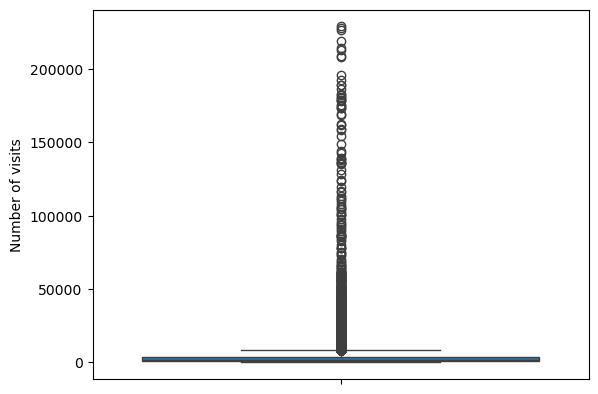

In [20]:
# Check removal of extreme values

sns.boxplot(y='Number of visits', data=df)

<Axes: xlabel='Number of nights', ylabel='Count'>

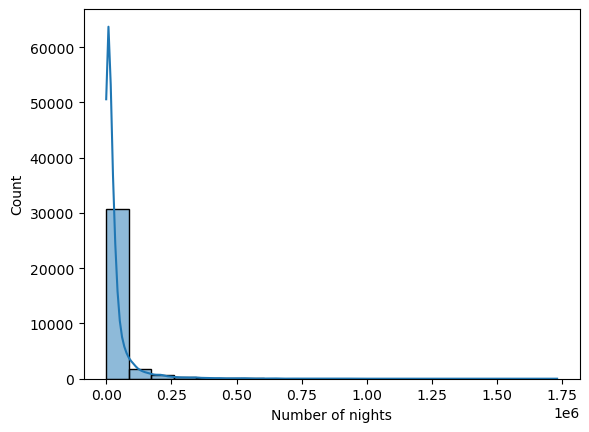

In [21]:
sns.histplot(df['Number of nights'], bins=20, kde = True)

<Axes: ylabel='Number of nights'>

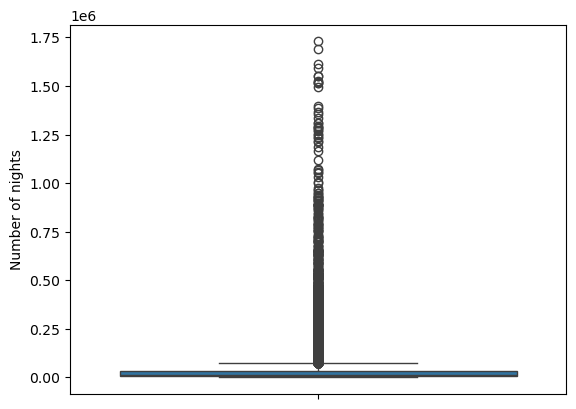

In [22]:
sns.boxplot(y='Number of nights', data=df)

In [23]:
# Clean extreme values

df = df[df['Number of nights'] < 1600000] 

<Axes: ylabel='Number of nights'>

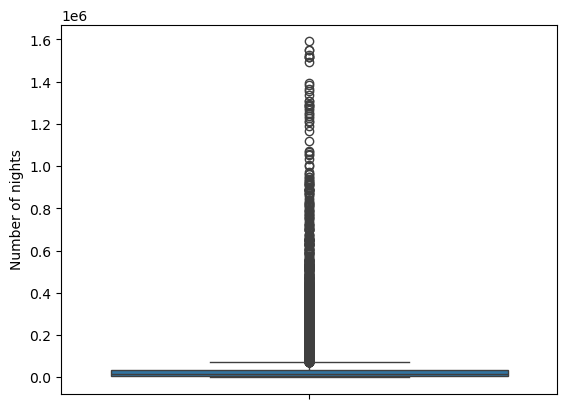

In [24]:
# Check removal of extreme values

sns.boxplot(y='Number of nights', data=df)

<Axes: xlabel='Expenditure', ylabel='Count'>

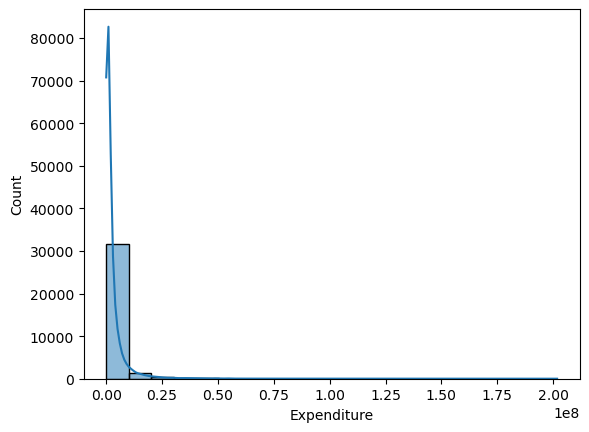

In [25]:
sns.histplot(df['Expenditure'], bins=20, kde = True)

<Axes: ylabel='Expenditure'>

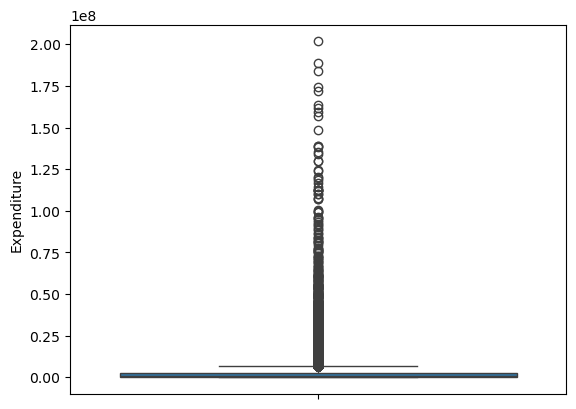

In [26]:
sns.boxplot(y='Expenditure', data=df)

In [27]:
# Clean extreme values

df = df[df['Expenditure'] < 200000000] 

<Axes: ylabel='Expenditure'>

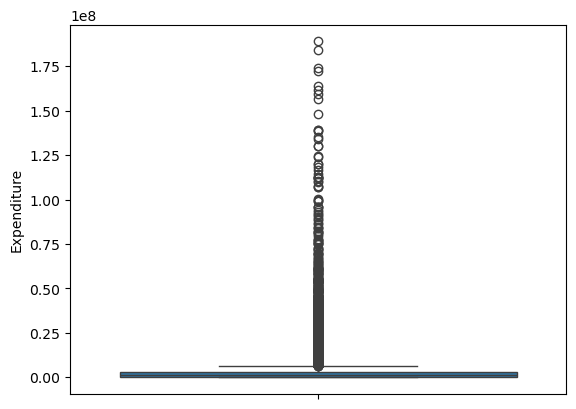

In [28]:
# Check removal of extreme values

sns.boxplot(y='Expenditure', data=df)

As in previous exercises, I have left in some 'extreme' values as they are the result of high sample sizes (many people surveyed travelled to those countries).

In [29]:
# Create UK residents subset

df_uk_residents = df.loc[df['UKOS'].isin(['UK residents'])]

In [30]:
# Combine the number of visits made to each country by UK residents

df_sum_uk_residents = df_uk_residents.groupby('Country')['Number of visits'].sum()

In [31]:
df_sum_uk_residents.head()

Country
0                983.267
Australia     417895.784
Austria       723444.794
Barbados      229382.827
Belgium      1293600.805
Name: Number of visits, dtype: float64

In [32]:
# Drop Country '0'

df_sum_uk_residents = df_sum_uk_residents.drop('0')

In [33]:
df_sum_uk_residents.head()

Country
Australia     417895.784
Austria       723444.794
Barbados      229382.827
Belgium      1293600.805
Bulgaria      571368.608
Name: Number of visits, dtype: float64

In [34]:
# Create overseas residents subset

df_overseas_residents = df.loc[df['UKOS'].isin(['Overseas residents'])]

In [35]:
# Combine the number of visits made from each country to the UK

df_sum_overseas_residents = df_overseas_residents.groupby('Country')['Number of visits'].sum()

In [36]:
df_sum_overseas_residents.head()

Country
Australia    1346514.304
Austria       380352.166
Barbados       32805.331
Belgium       918508.986
Bulgaria      242363.326
Name: Number of visits, dtype: float64

### 4. Creating a choropleth map

In [37]:
# Setup a folium map at a high-level zoom - UK residents
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = countries_geo, 
    data = df_sum_uk_residents,
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Number of visits").add_to(map)
folium.LayerControl().add_to(map)

map

In [38]:
map.save('uk_residents_sum_visits.html')

In [39]:
# Setup a folium map at a high-level zoom - Overseas residents
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = countries_geo, 
    data = df_sum_overseas_residents,
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Number of visits").add_to(map)
folium.LayerControl().add_to(map)

map

In [40]:
map.save('overseas_residents_sum_visits.html')

### 5. Discussing results

I created two choropleth maps - one to see which countries were most visited by UK residents and another to see from which countries most visitors to the UK came.

With regards to the countries visited by UK residents, I was unsurprised to see that the country most visited was Spain. Spain has long been a popular destination and obviously still remains so, despite other, further flung, countries being easier than ever to get to. Our near-neighbour, France, sees the next-highest number of visits - also unsurprising, considering that it is linked to the UK by air, ferry and tunnel. 
Of the non-European countries, the U.S. is one of the most popular to visit, alongside Turkey. The UK has long been fascinated by the U.S., having seen what it has to offer on our TV and cinema screens since the dawn of film. Cheaper flights in more recent years have made it more accessible than ever. Turkey has become more popular in recent years, with many package deals offering reasonably-priced holidays, where hot weather is in much more plentiful supply than at home!

I was more surprised by the countries from which overseas visitors mostly came. The UK's love of Spain was not recipricated in quite the same way, with fewer visitors coming from there than those visiting from the UK. More visits came from France, Germany and Ireland, but the highest number of visits came from the U.S. I had not realised that the U.S. facination with UK culture would mean that more visitors would come from there than much geographically nearer countries. Of the other non-European visitors, Canadian and Australian visitors were next in terms of number of visits. This could be partially explained by much closer cultural relations, as fellow Commonwealth countries to which many Britons emigrated, especially in the middle of the 20th century.

This analysis answers a number of 'where' questions, but raises an equal number of 'why' questions - why do so many visitors come from the U.S.? Are visitors from Canada and Australia mainly visiting friends and family? Are the majority of visitors from the UK to Turkey on package holidays and is that the case as well for visitors to the U.S.?